In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

C:\Users\TANU SHREE\AppData\Local\Temp\ipykernel_82584\2151744951.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df=pd.read_csv('cleaned_agro_2018.csv')
df.head(10)

,Sail Date.,QTY.(KGS)
0,2018-01-01,257733
1,2018-01-04,577207
2,2018-01-05,1322201
3,2018-01-06,1652038
4,2018-01-07,1548883
5,2018-01-08,912316
6,2018-01-09,581753
7,2018-01-10,1172197
8,2018-01-12,263069
9,2018-01-14,443842


In [3]:
df.info()
df.sort_values(by='Sail Date.', inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268 entries, 0 to 267
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Sail Date.  268 non-null    object
 1   QTY.(KGS)   268 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 4.3+ KB


In [4]:
df = df.groupby('Sail Date.')['QTY.(KGS)'].sum().reset_index()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268 entries, 0 to 267
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Sail Date.  268 non-null    object
 1   QTY.(KGS)   268 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 4.3+ KB


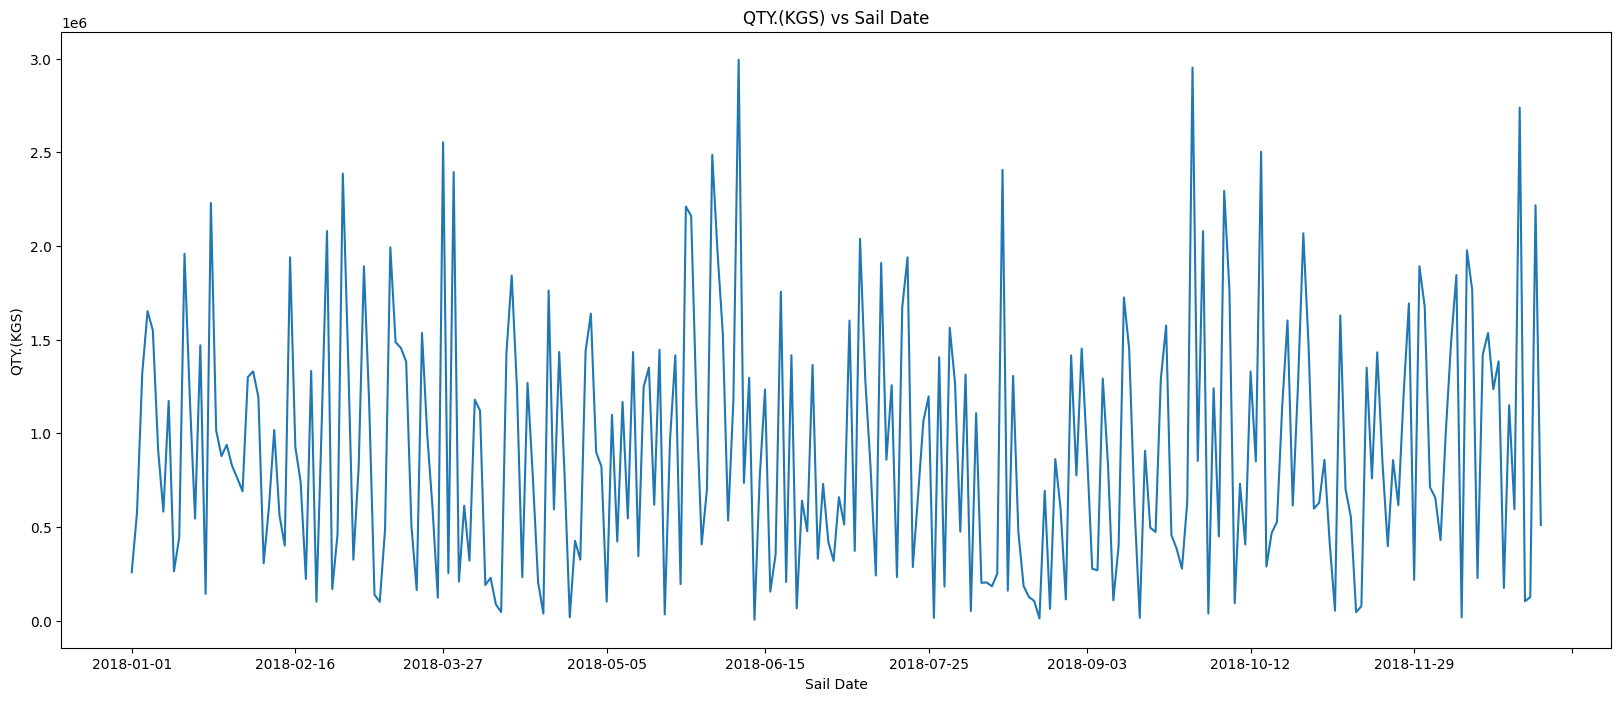

In [6]:
from matplotlib.dates import MonthLocator

plt.figure(figsize=(20, 8))
plt.plot(df['Sail Date.'], df['QTY.(KGS)'])
plt.xlabel('Sail Date')
plt.ylabel('QTY.(KGS)')
plt.title('QTY.(KGS) vs Sail Date')

plt.gca().xaxis.set_major_locator(MonthLocator(interval=1))

plt.show()

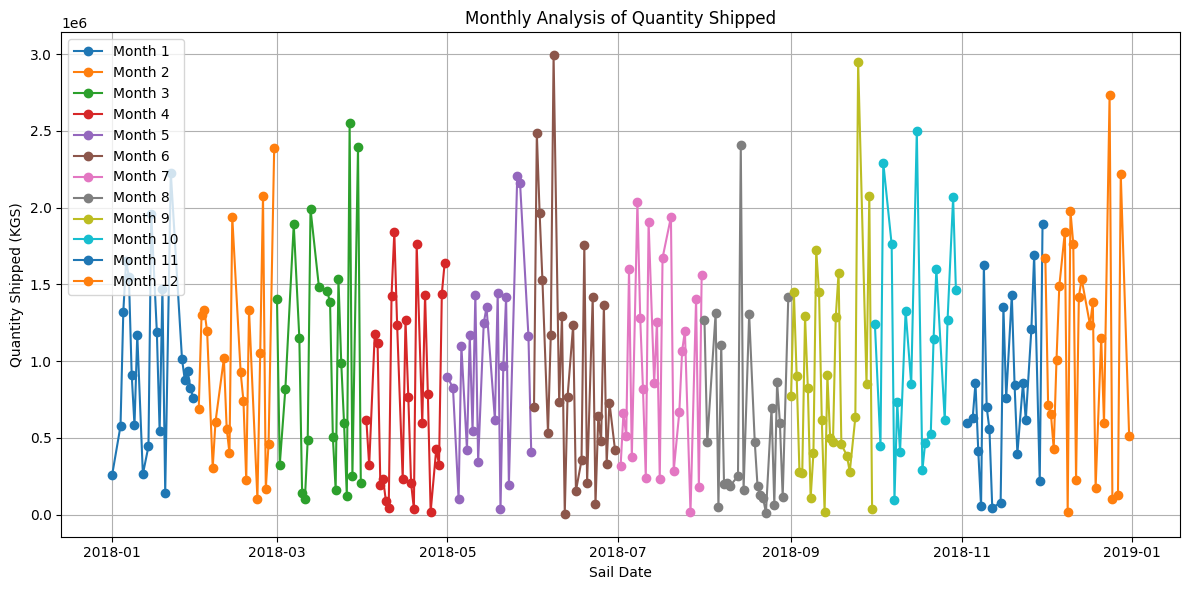

In [7]:
df['Sail Date.'] = pd.to_datetime(df['Sail Date.'], errors='coerce')  

if pd.api.types.is_datetime64_any_dtype(df['Sail Date.']):
    
    df['Year'] = df['Sail Date.'].dt.year
    df['Month'] = df['Sail Date.'].dt.month

    # Plotting
    plt.figure(figsize=(12, 6))

    for month in range(1, 13):
  
        month_data = df[df['Month'] == month]

        
        plt.plot(month_data['Sail Date.'], month_data['QTY.(KGS)'], marker='o', linestyle='-', label=f'Month {month}')

    plt.xlabel('Sail Date')
    plt.ylabel('Quantity Shipped (KGS)')
    plt.title('Monthly Analysis of Quantity Shipped')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("Error: 'Sail Date.' column could not be converted to datetime.")

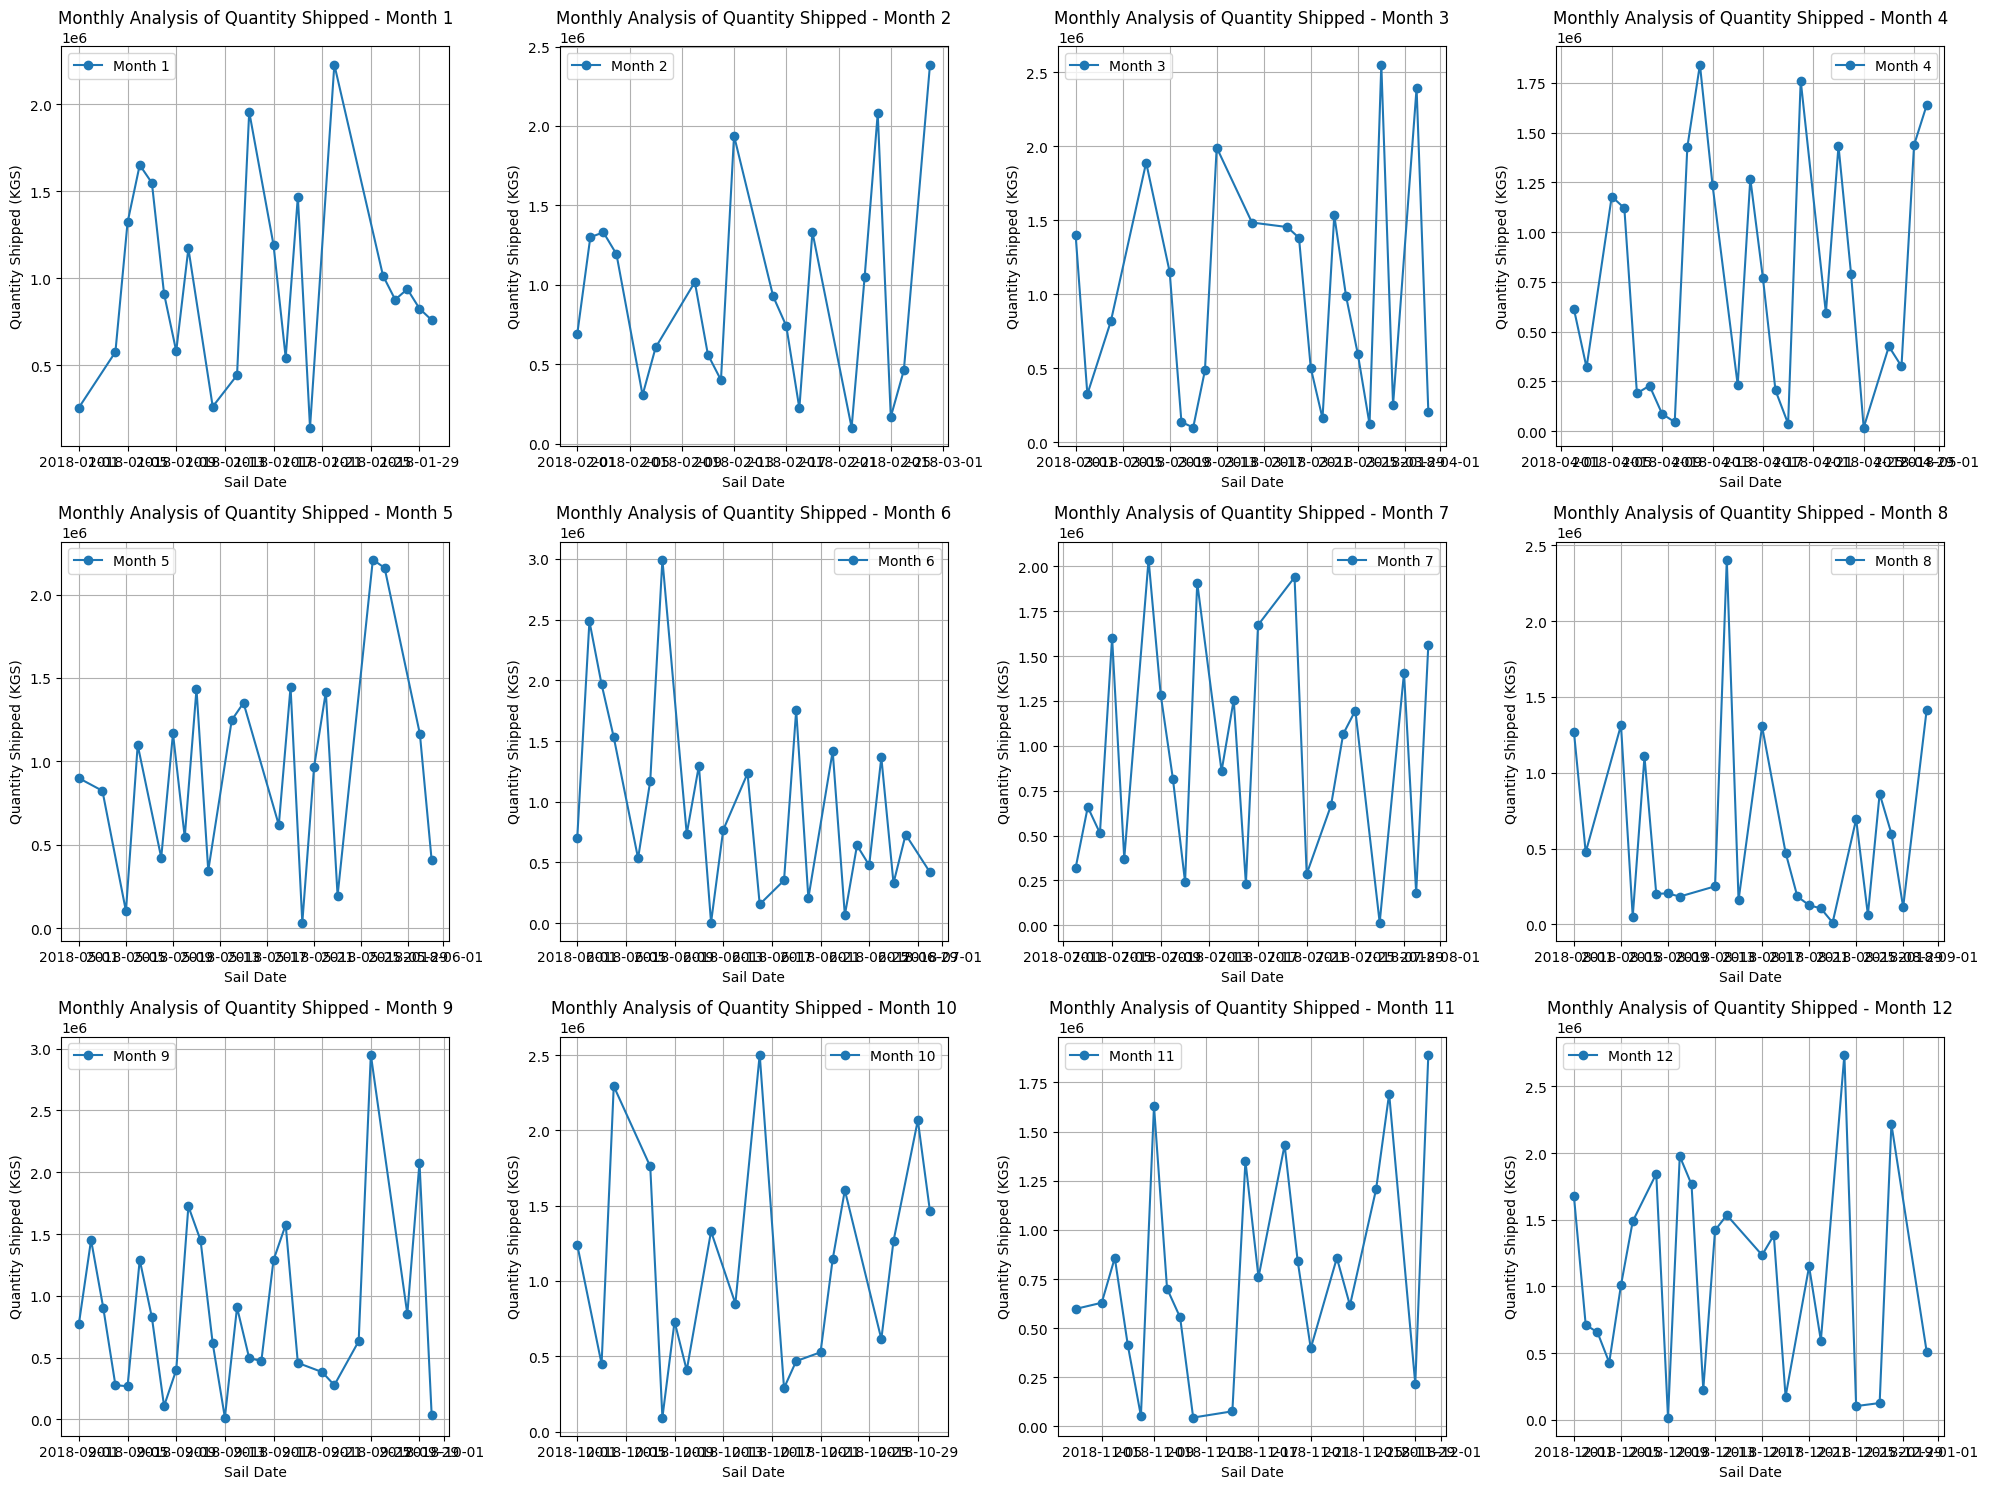

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

if pd.api.types.is_datetime64_any_dtype(df['Sail Date.']):
    df['Month'] = df['Sail Date.'].dt.month

    fig, axes = plt.subplots(3, 4, figsize=(20, 15))

    for month in range(1, 13):
        row = (month - 1) // 4
        col = (month - 1) % 4

        month_data = df[df['Month'] == month]

        axes[row, col].plot(month_data['Sail Date.'], month_data['QTY.(KGS)'], marker='o', linestyle='-',
                            label=f'Month {month}')
        axes[row, col].set_xlabel('Sail Date')
        axes[row, col].set_ylabel('Quantity Shipped (KGS)')
        axes[row, col].set_title(f'Monthly Analysis of Quantity Shipped - Month {month}')
        axes[row, col].legend()
        axes[row, col].grid(True)

    plt.tight_layout()
    plt.show()
else:
    print("Error: 'Sail Date.' column could not be converted to datetime.")


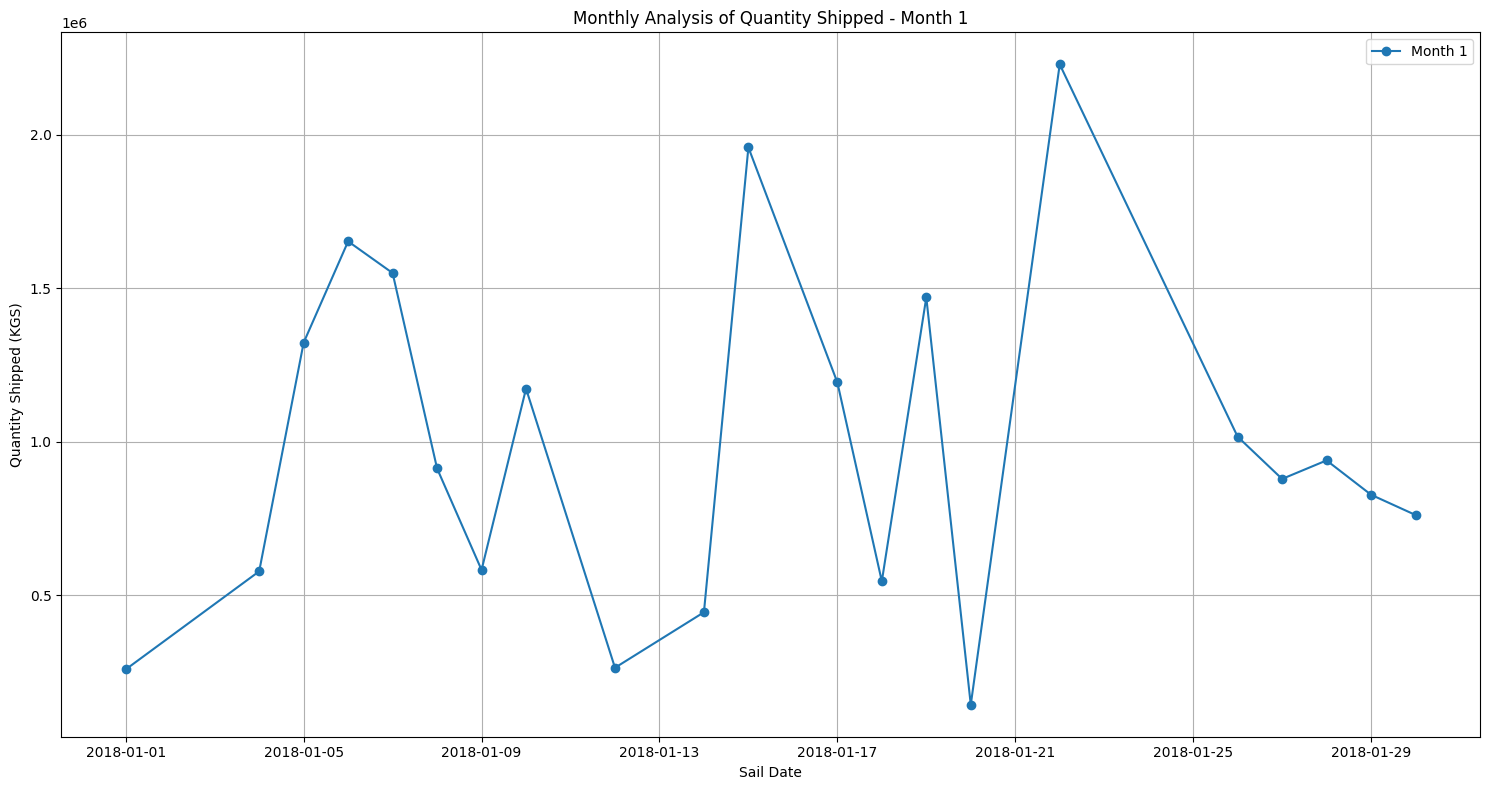

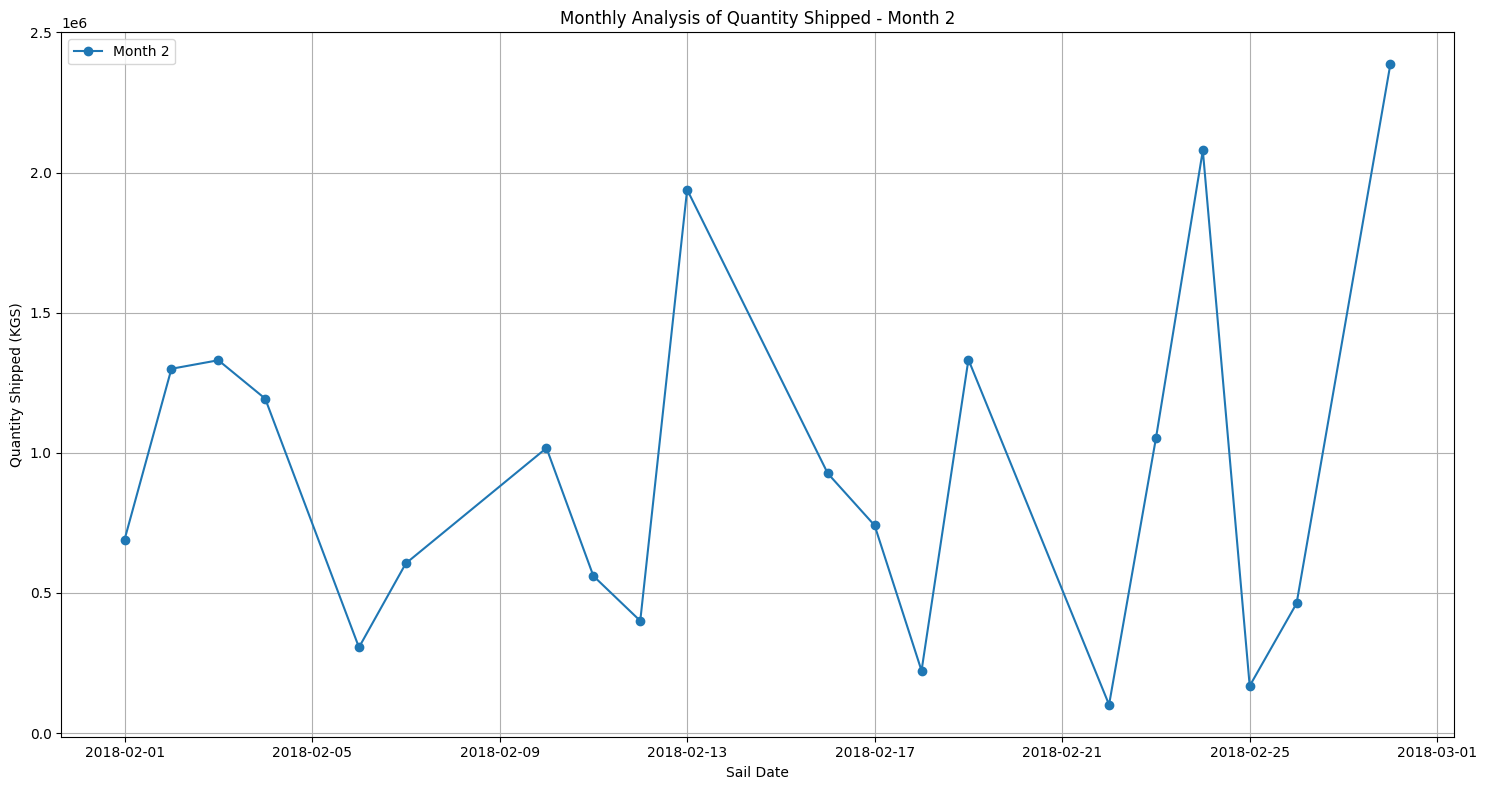

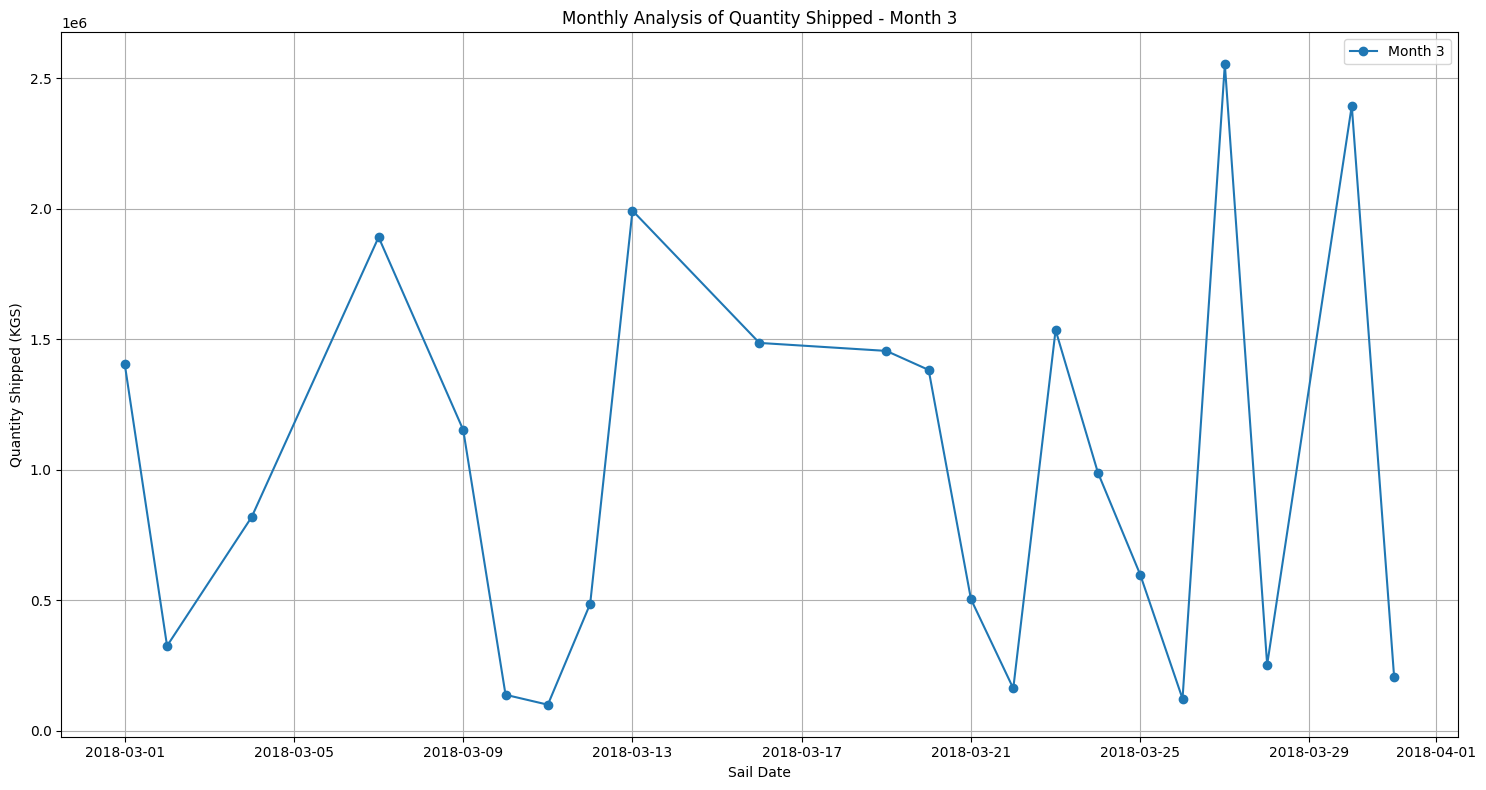

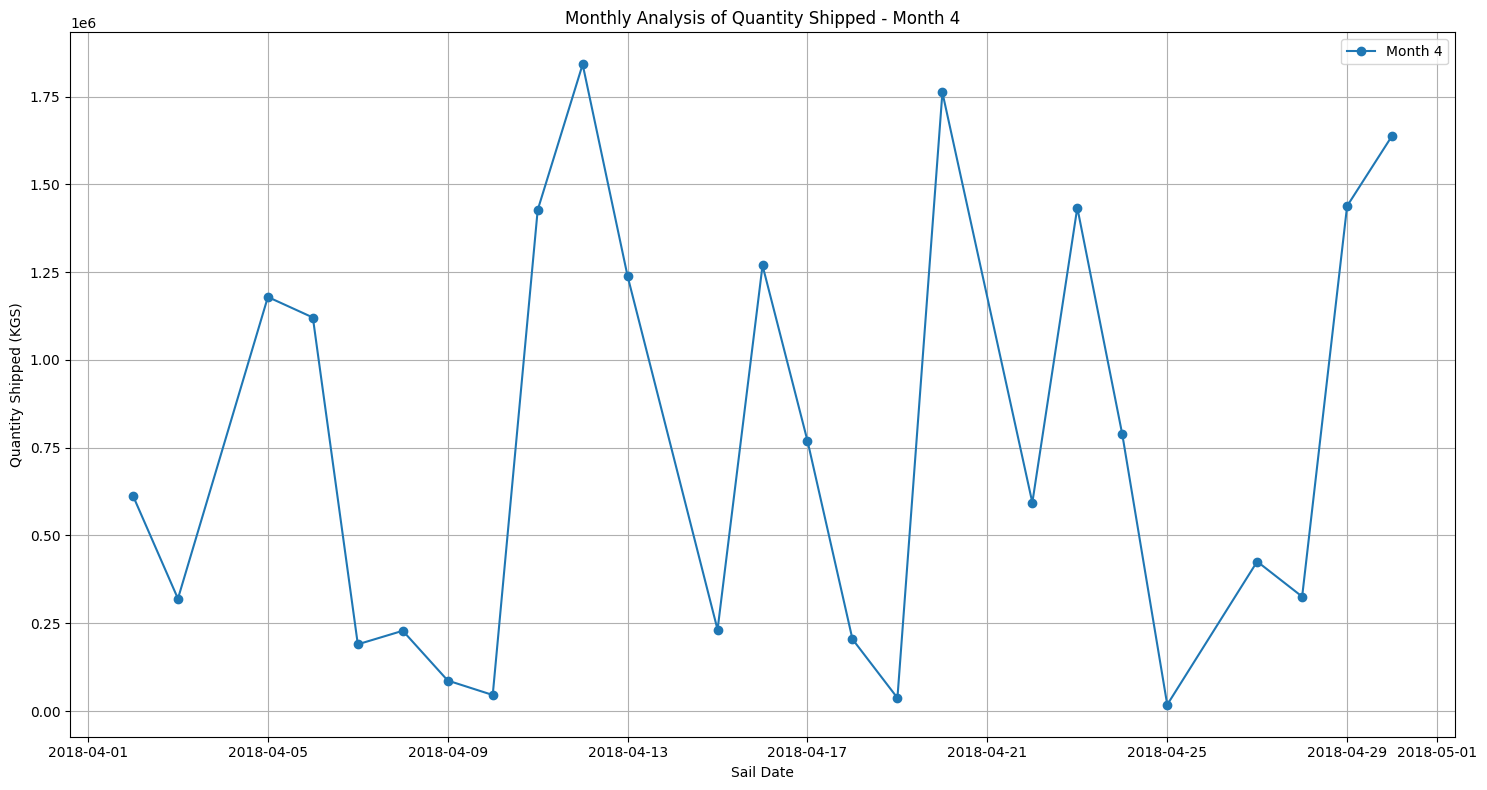

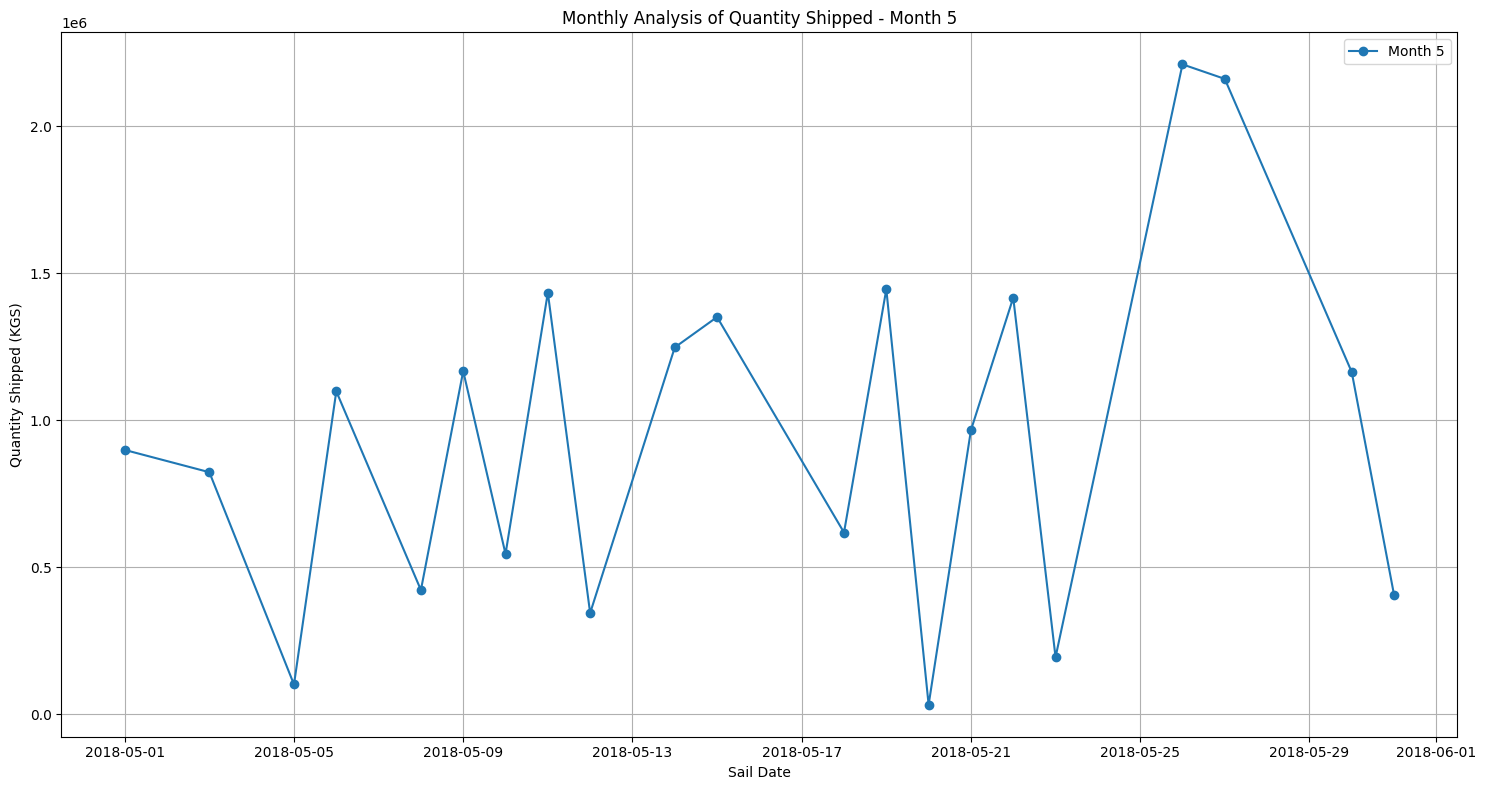

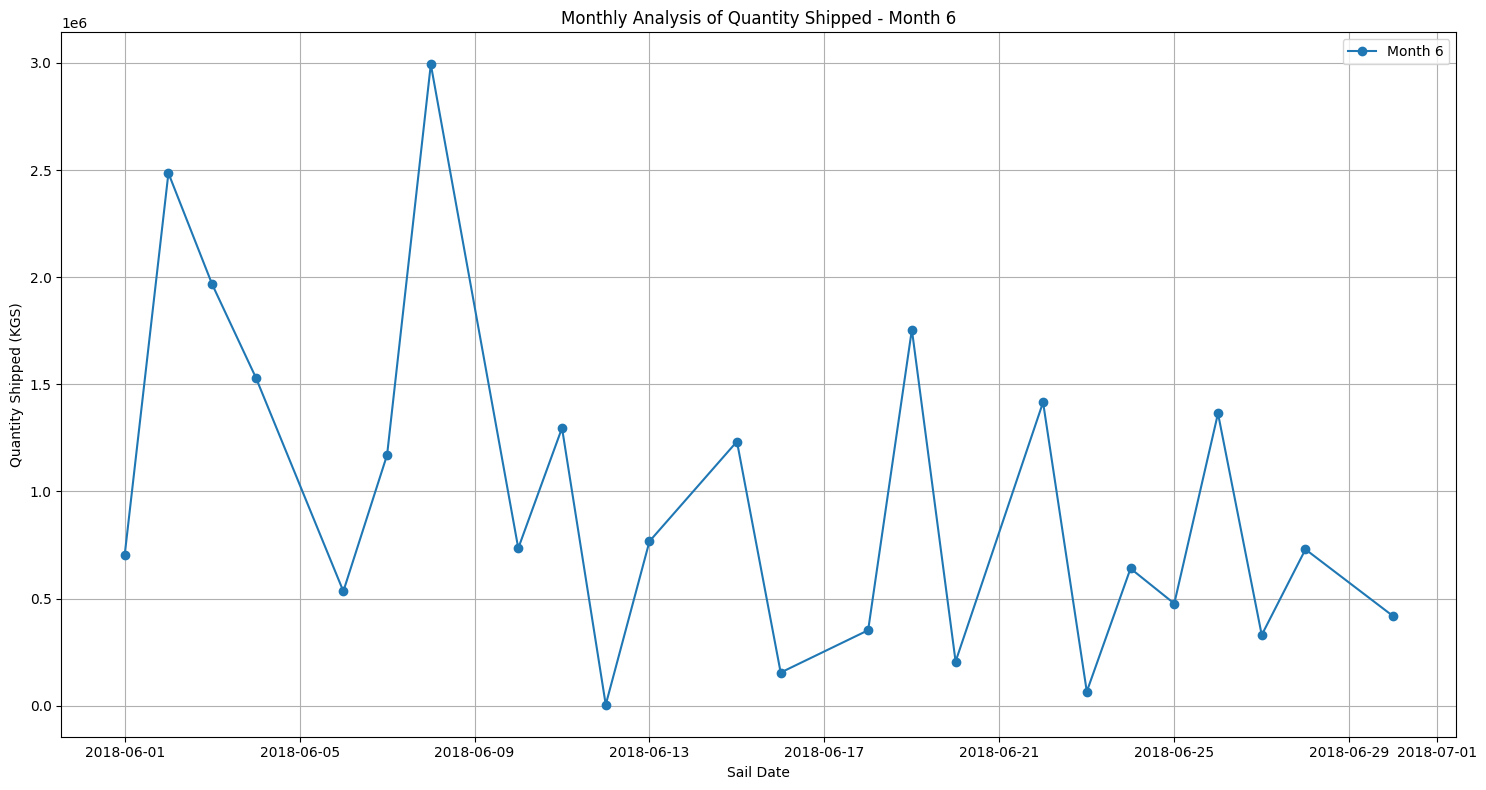

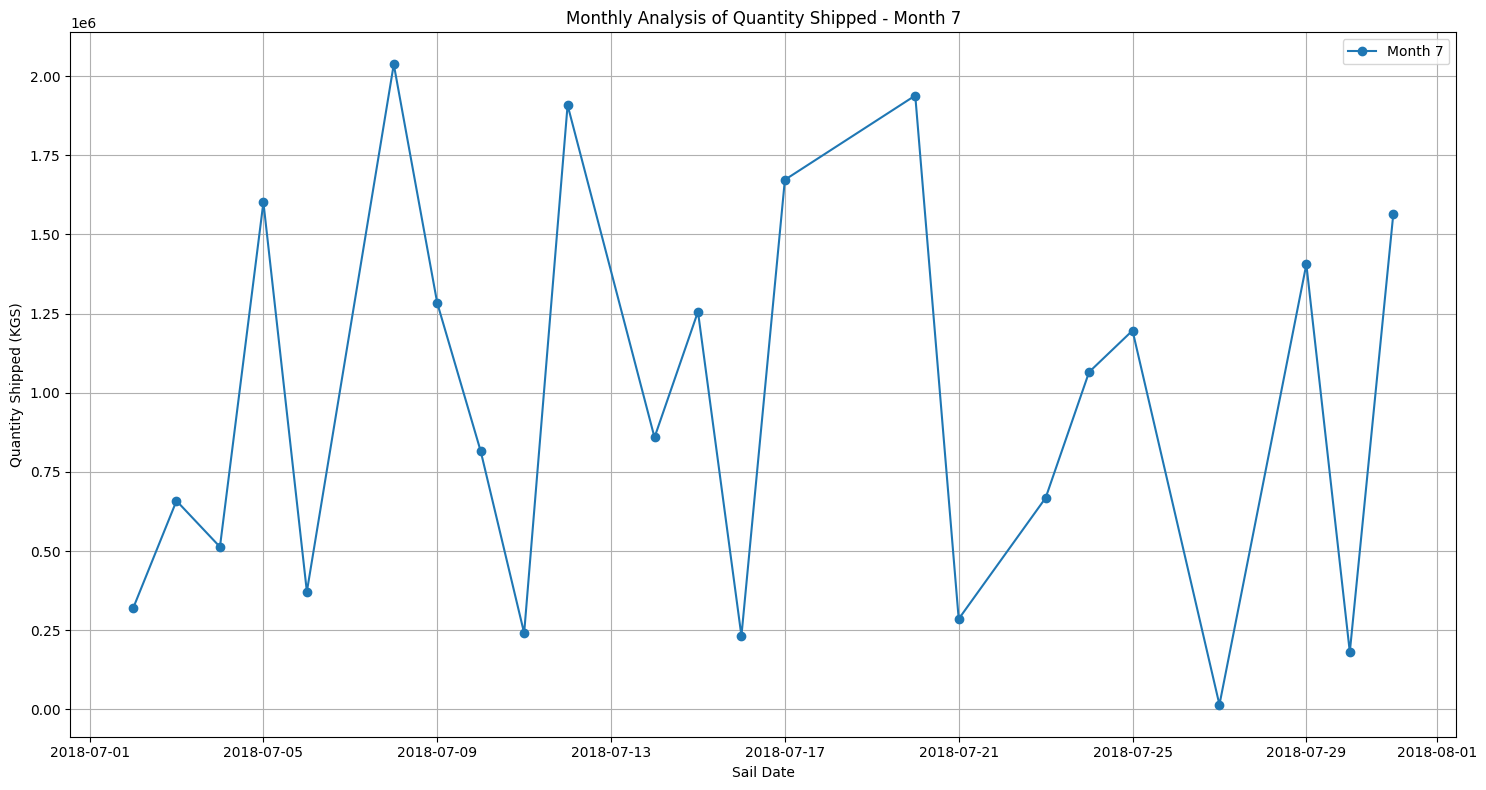

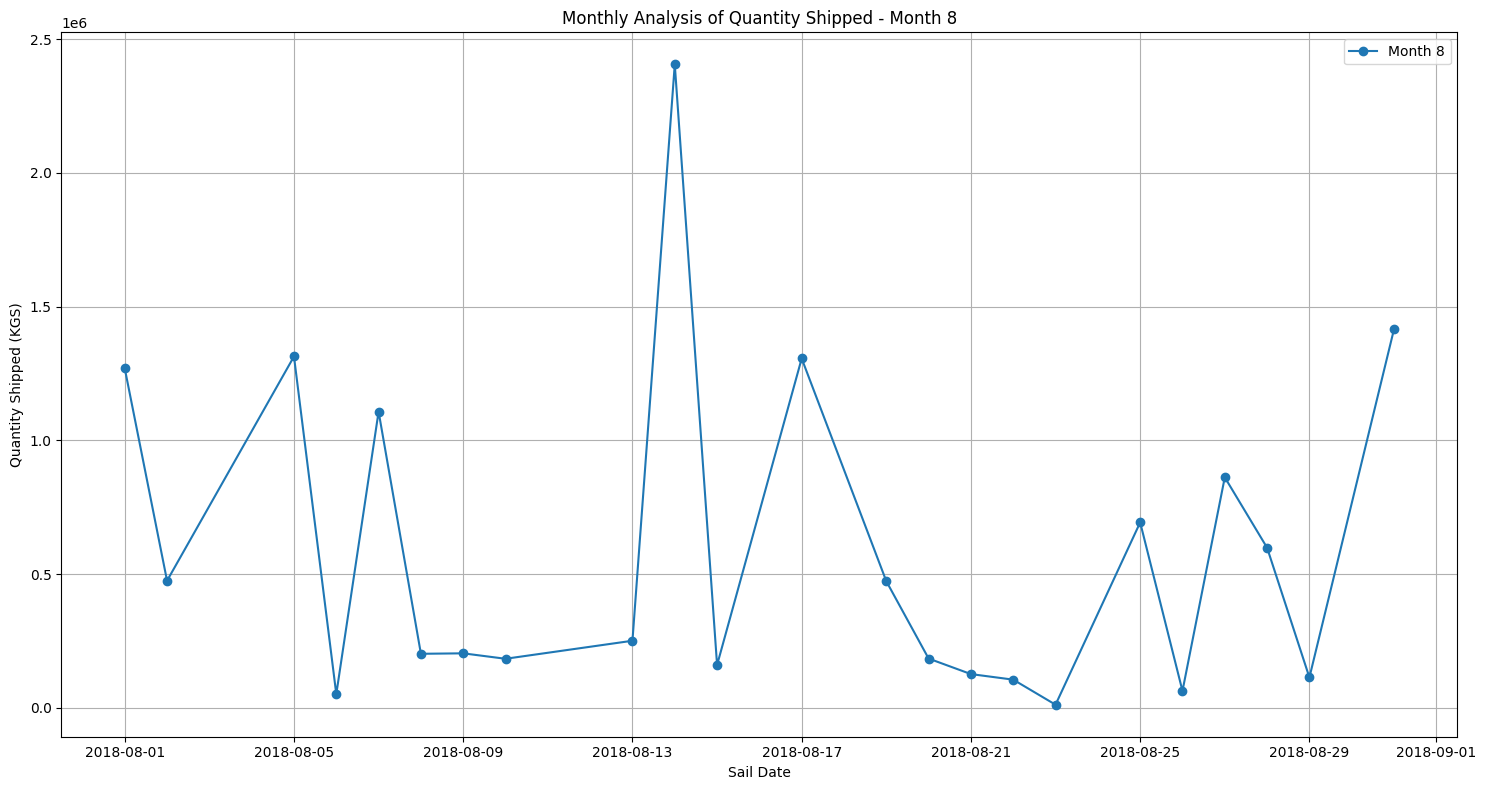

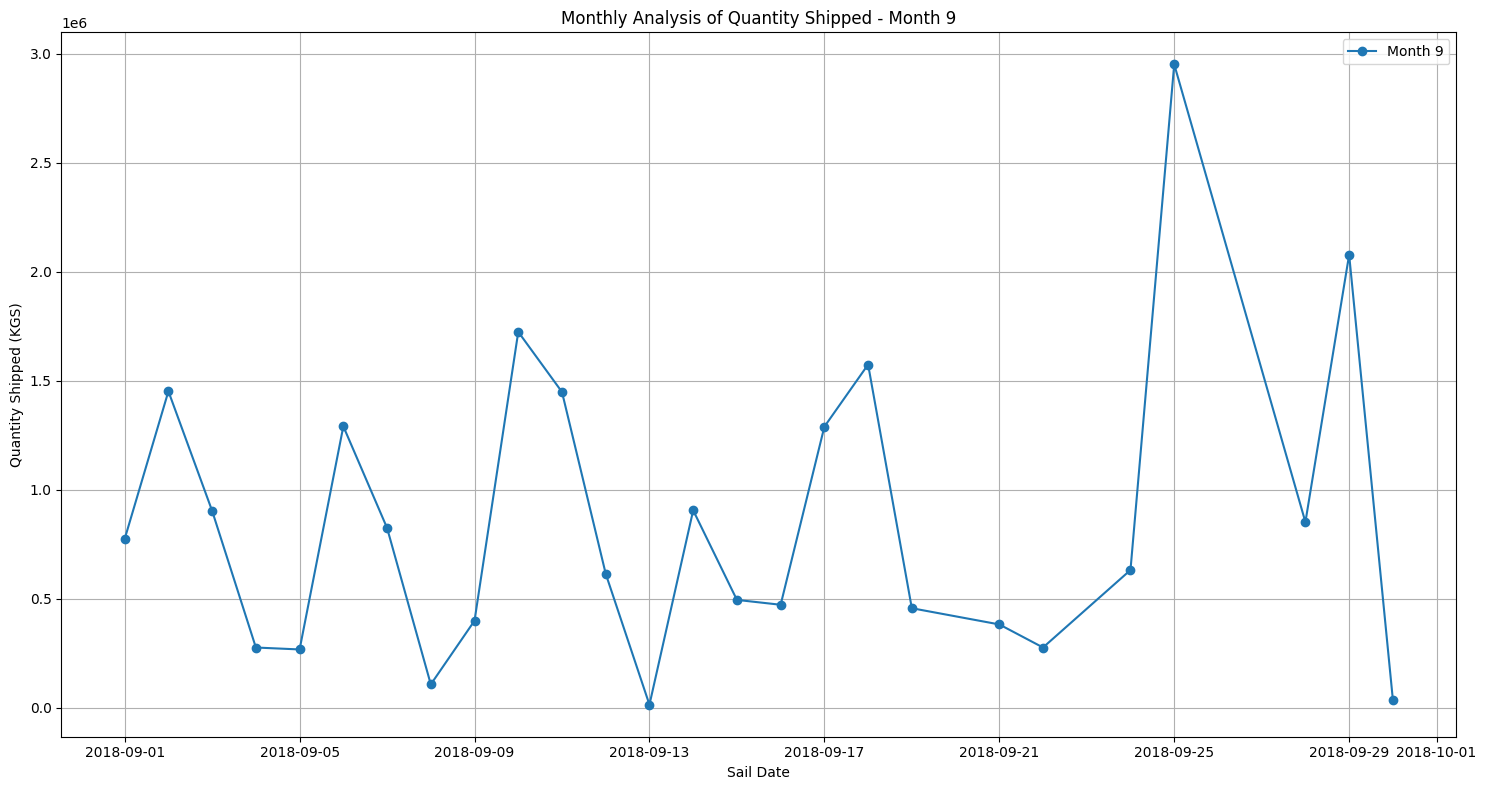

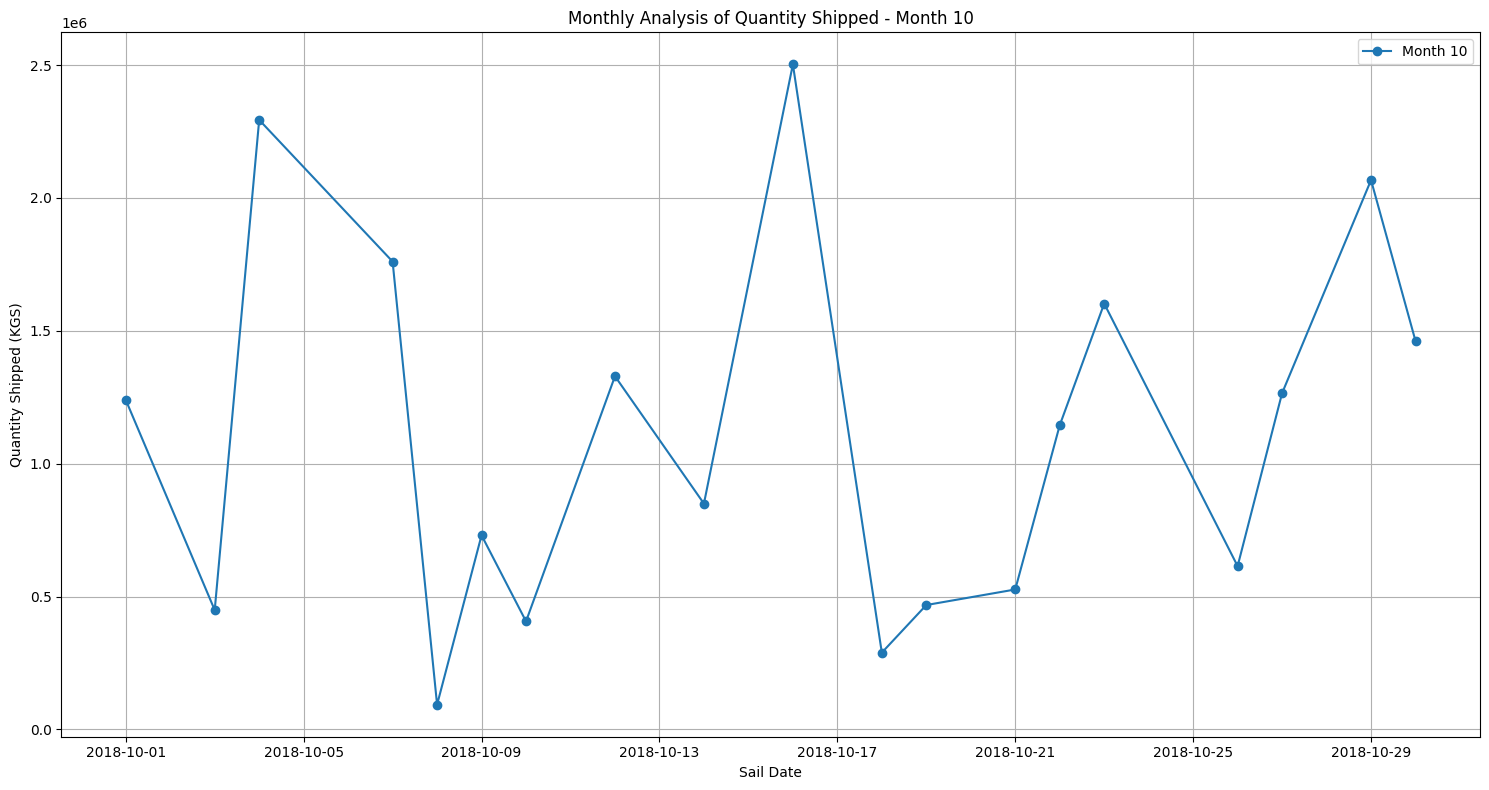

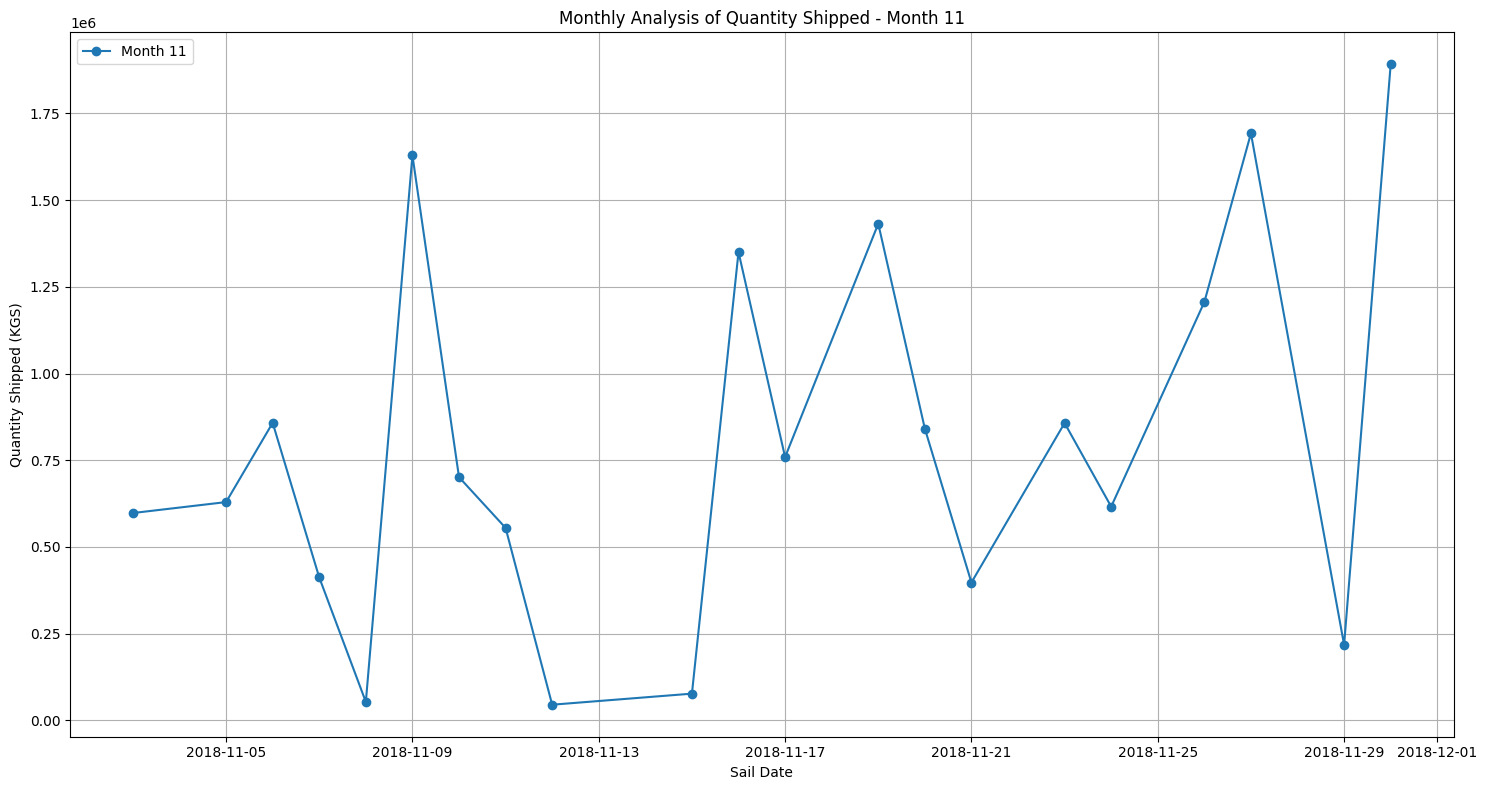

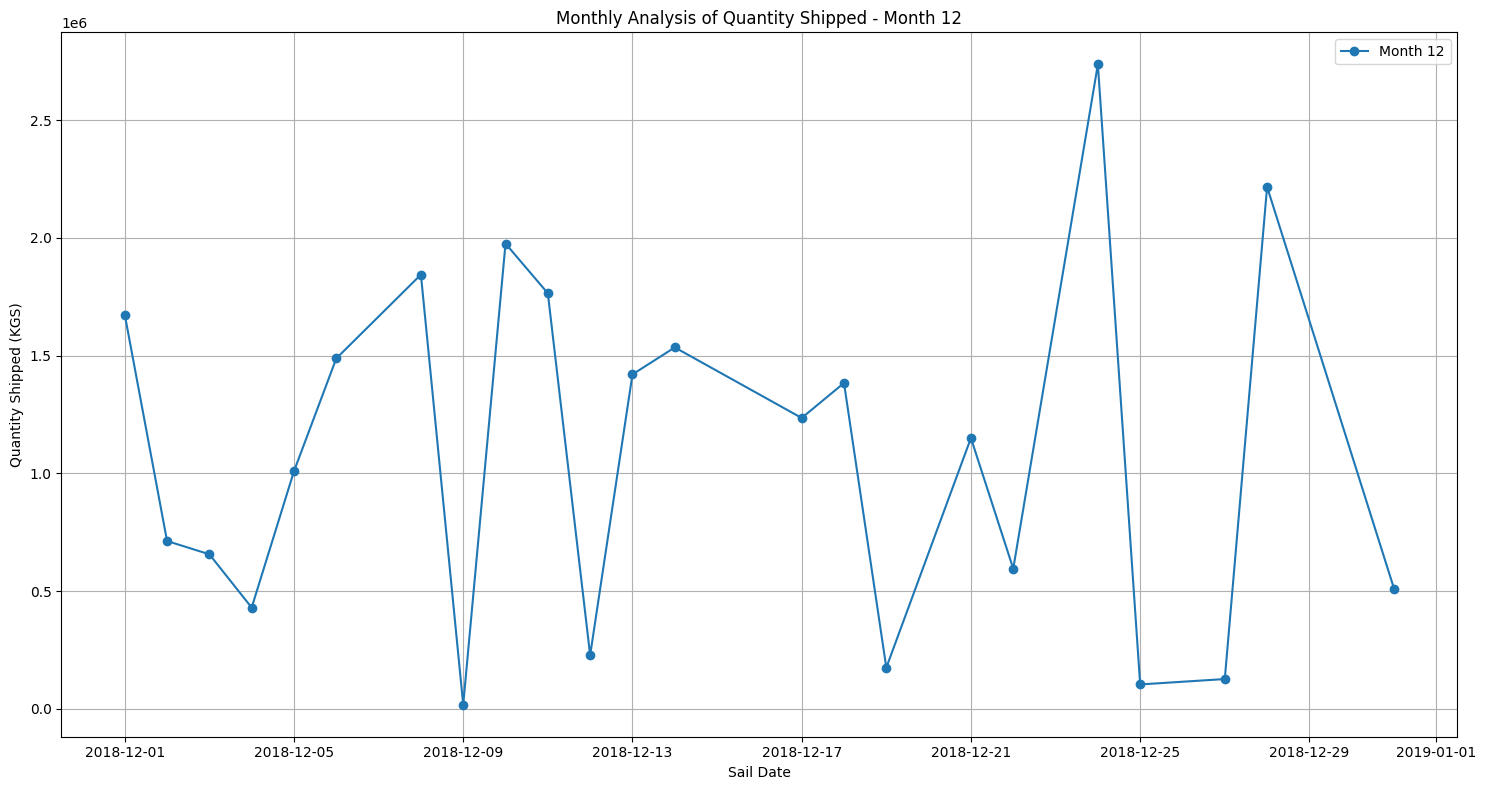

In [9]:
if pd.api.types.is_datetime64_any_dtype(df['Sail Date.']):
    
    df['Month'] = df['Sail Date.'].dt.month

    
    for month in range(1, 13):
       
        month_data = df[df['Month'] == month]

        # Plotting
        plt.figure(figsize=(15,8))
        plt.plot(month_data['Sail Date.'], month_data['QTY.(KGS)'], marker='o', linestyle='-', label=f'Month {month}')
        plt.xlabel('Sail Date')
        plt.ylabel('Quantity Shipped (KGS)')
        plt.title(f'Monthly Analysis of Quantity Shipped - Month {month}')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()
else:
    print("Error: 'Sail Date.' column could not be converted to datetime.")

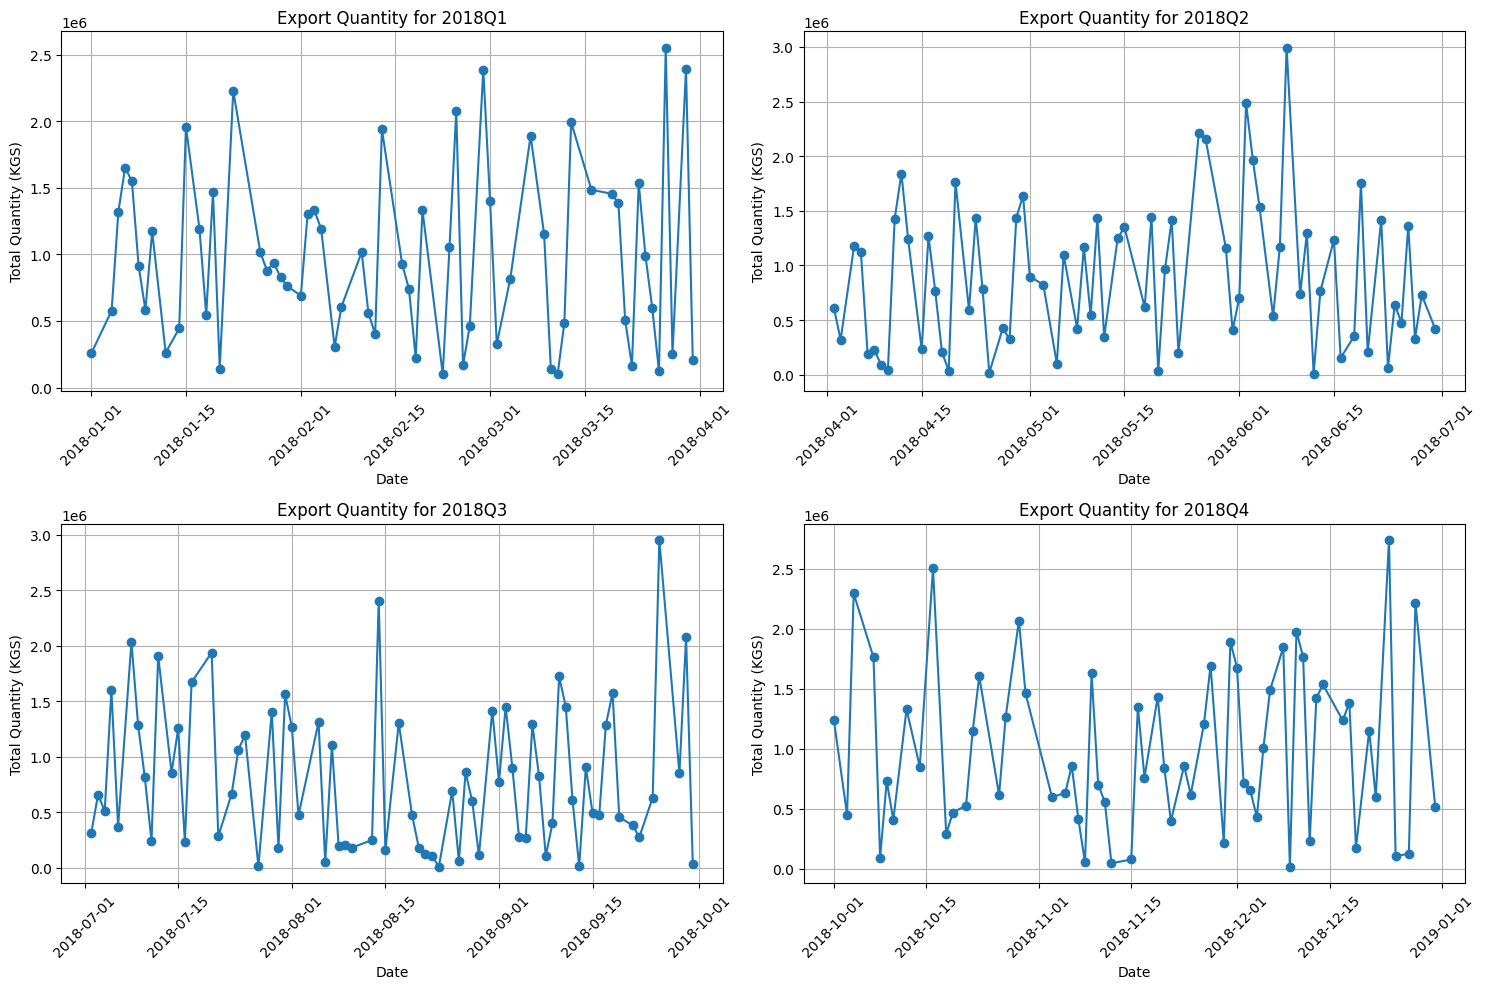

In [10]:
df['Quarter'] = df['Sail Date.'].dt.to_period('Q')


unique_quarters = df['Quarter'].unique()

# Create the plot with subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

for i, quarter in enumerate(unique_quarters):
    # Calculate subplot index
    row = i // 2  # Calculate row index
    col = i % 2   # Calculate column index

    # Filter the data for the current quarter
    quarter_data = df[df['Quarter'] == quarter]

    # Plotting
    axes[row, col].plot(quarter_data['Sail Date.'], quarter_data['QTY.(KGS)'], marker='o')
    axes[row, col].set_title(f'Export Quantity for {quarter}')
    axes[row, col].set_xlabel('Date')
    axes[row, col].set_ylabel('Total Quantity (KGS)')
    axes[row, col].tick_params(axis='x', rotation=45)
    axes[row, col].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()


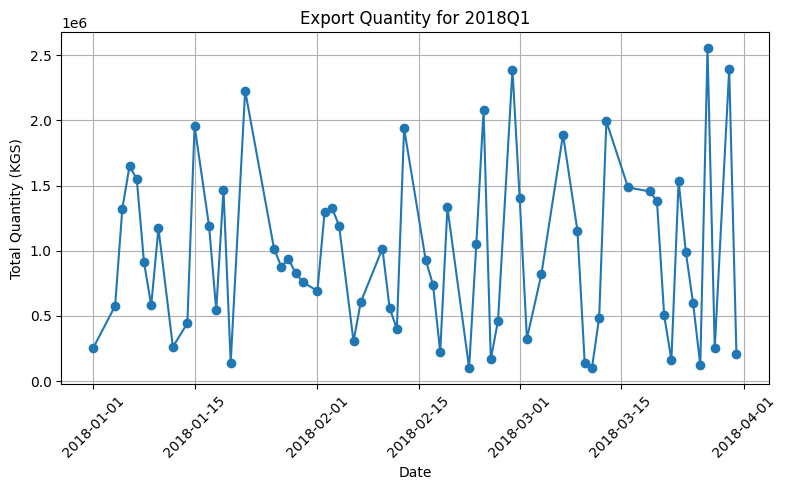

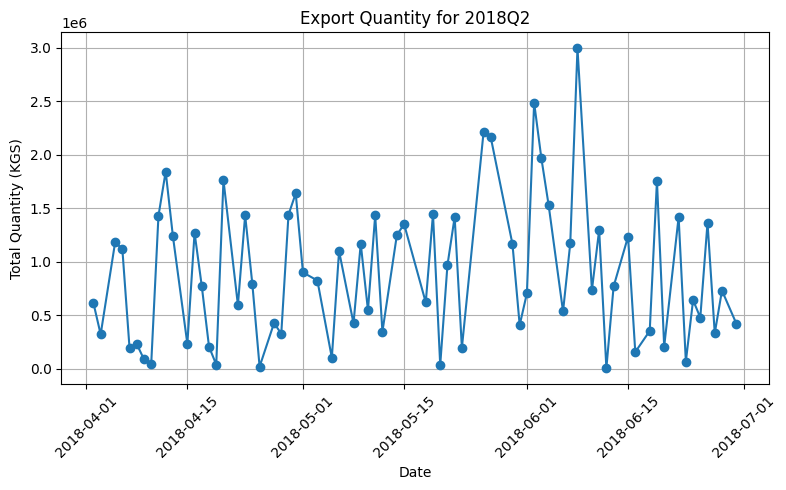

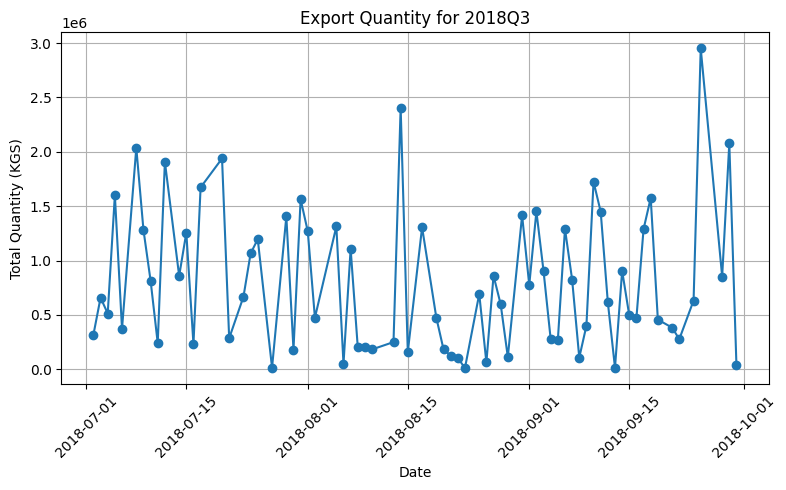

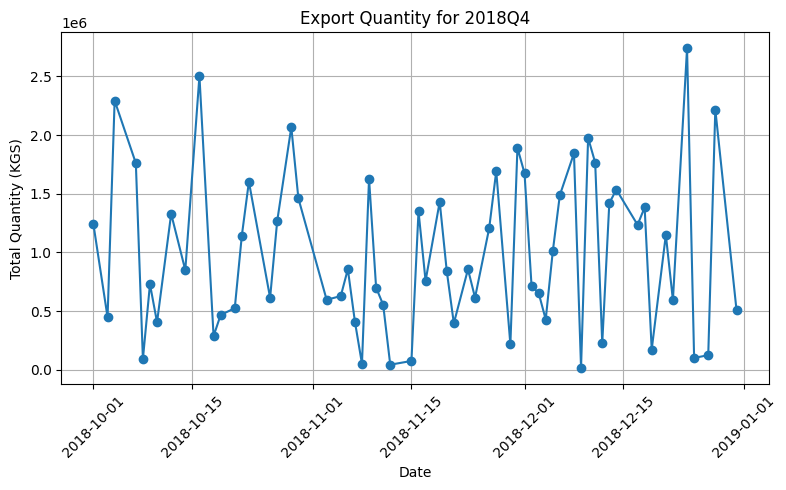

In [11]:
df['Quarter'] = df['Sail Date.'].dt.to_period('Q')

for quarter in df['Quarter'].unique():
    plt.figure(figsize=(8, 5))
    quarter_data = df[df['Quarter'] == quarter]
    plt.plot(quarter_data['Sail Date.'], quarter_data['QTY.(KGS)'], marker='o')
    plt.title(f'Export Quantity for {quarter}')
    plt.xlabel('Date')
    plt.ylabel('Total Quantity (KGS)')
    plt.xticks(rotation=45)
    plt.grid()
    plt.tight_layout()
    plt.show()

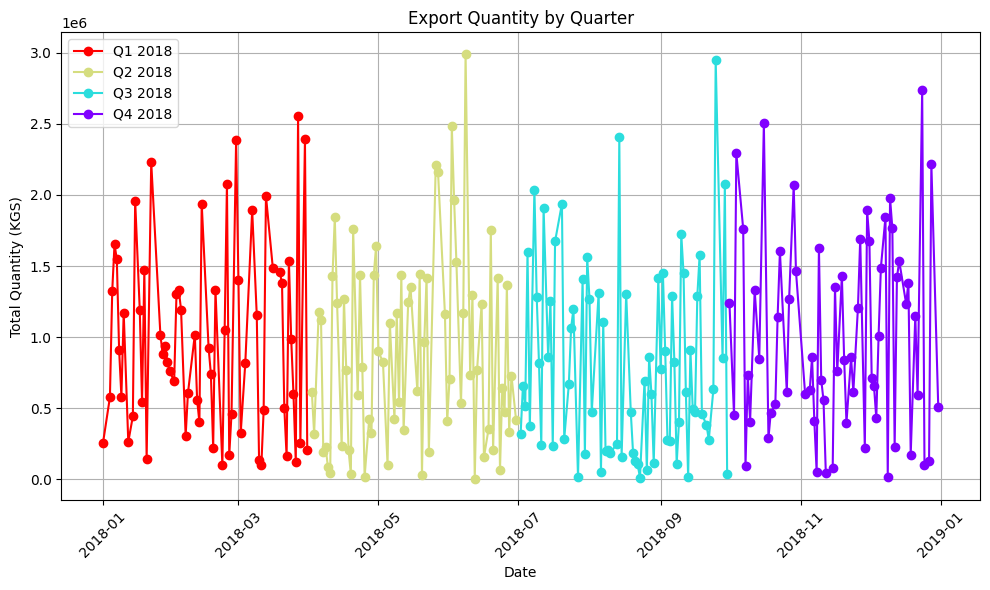

In [12]:
import matplotlib.cm as cm

unique_quarters = df['Quarter'].unique()

# Create a color map for quarters
colors = cm.rainbow_r(np.linspace(0, 1, len(unique_quarters)))

# Plot each quarter's export with different color
plt.figure(figsize=(10, 6))
for i, quarter in enumerate(unique_quarters):
    quarter_data = df[df['Quarter'] == quarter]
    plt.plot(quarter_data['Sail Date.'], quarter_data['QTY.(KGS)'], marker='o', label=f'Q{quarter.quarter} {quarter.year}', color=colors[i])

plt.title('Export Quantity by Quarter')
plt.xlabel('Date')
plt.ylabel('Total Quantity (KGS)')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


<Figure size 1200x800 with 0 Axes>

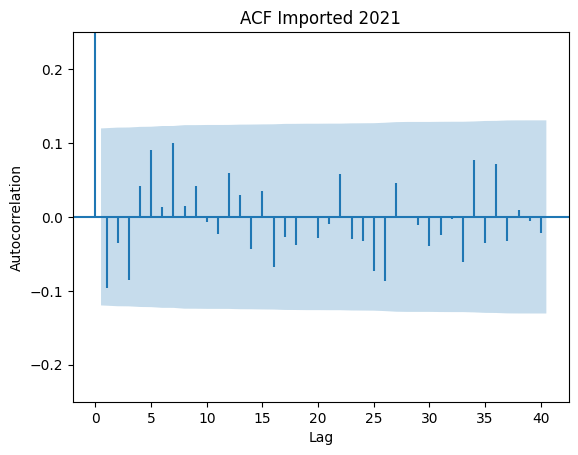

In [13]:
from statsmodels.graphics.tsaplots import plot_acf

# Assuming df is your DataFrame containing the sales data

# Specify the column name
sail_date_column = 'Sail Date.'

# Check if the specified column exists in the DataFrame
if sail_date_column in df.columns:
    # Attempt to convert 'Sail Date.' to datetime
    try:
        df[sail_date_column] = pd.to_datetime(df[sail_date_column])
    except ValueError as e:
        # Print the error message and problematic values
        print(f"Error: Unable to convert '{sail_date_column}' to datetime.")
        print("Problematic values:")
        problematic_values = df.loc[~df[sail_date_column].apply(lambda x: pd.to_datetime(str(x), errors='coerce')).notna(), sail_date_column]
        print(problematic_values)
    
    # Check if the column was successfully converted to datetime
    if pd.api.types.is_datetime64_any_dtype(df[sail_date_column]):
        # Set 'Sail Date.' column as index
        df.set_index(sail_date_column, inplace=True)
        
        # Increase figure size
        plt.figure(figsize=(12, 8))

        # Plot the autocorrelation function (ACF)
        plot_acf(df['QTY.(KGS)'], lags=40, marker=None)  # Adjust lags as needed
        plt.xlabel('Lag')
        plt.ylabel('Autocorrelation')
        plt.title('ACF Imported 2021')
        
        # Set y-axis limits
        plt.ylim(-0.25, 0.25)
        
        plt.show()
    else:
        print(f"Error: '{sail_date_column}' column exists but could not be converted to datetime.")
else:
    print(f"Error: '{sail_date_column}' column not found in the DataFrame.")